> **Reference**<br>
> * 시계열 데이터 분석 with 파이썬 강의(Jose Portilla, Udemy)
> * [파이썬으로 배우는 알고리즘 트레이딩](https://wikidocs.net/4370)
> * [Datareader GitHub](https://pandas-datareader.readthedocs.io/en/latest/index.html)
> * [FinanceDataReader GitHub](https://financedata.github.io/posts/finance-data-reader-users-guide.html)

# **데이터 : 2022년 삼성전자 주가**

## **1. 주식 데이터 가져오기**

### **1) pandas-datareader 이용**
* website(yahoo, naver ...)에서 직접 데이터를 가져온다.<br>
제공하는 사이트는 다양하다. [github](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-naver)에 사이트마다의 코드 예시가 설명되어 있다. 
* 종목코드, 시작일, 종료일이 필요하다. 
* Output: Open(시가), High(고가), Low(저가), Close(종가), Volume(거래량)

In [115]:
import pandas_datareader.data as web        # pip install pandas-datareader

samsung = web.DataReader("005930", "naver", start="2022-01-01", end="2022-12-31")
samsung

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03,79400,79800,78200,78600,13502112
2022-01-04,78800,79200,78300,78700,12427416
2022-01-05,78800,79000,76400,77400,25470640
2022-01-06,76700,77600,76600,76900,12931954
2022-01-07,78100,78400,77400,78300,15163757
...,...,...,...,...,...
2022-12-23,58200,58400,57700,58100,9829407
2022-12-26,58000,58100,57700,57900,6756411
2022-12-27,58000,58400,57900,58100,10667027


### **2) FinanceDataReader 이용**
* Github에 따르면 pandas-datareader를 보완하기 위한 목적으로<br>
거래소별 종목 코드 리스트를 가져오는 기능이 있다고 한다. 
* 주식 데이터 뿐만 아니라 각종 지수, 환율, 암호화폐도 가능하다.

1. 종목코드 리스트 `fdr.StockListing()`
    * KRX = KOSPI + KOSDAQ + KONEX
    * NASDAQ
    * NYSE
    * AMEX
    * SP500             
&nbsp;

2. 가격 데이터 `fdr.DataReader(code, start, end)`
    * Output: Open(시가), High(고가), Low(저가), Close(종가), Volume(거래량), Change(전날대비 종가 상승률)    
&nbsp;
    <table style="width:90%">
        <tr>
            <th style="width:15%; font-weight:bold">code</th>
            <th style="width:70%; font-weight:bold">설명</th>      
        </tr>
        <tr>
            <td>주식코드</td>
            <td>한국 : 6자리 코드(ex.005930) / 미국 : 티커(ex.AAPL)</td>
        </tr>
        <tr>
            <td>지수</td>
            <td>한국: KS11, KQ11, KS50, KS100, KRX100, KS200<br>
                미국: DJI, IXIC, US500, VIX<br>
                기타: JP225, STOXX50E, CSI300, HSI, FTSE, DAX, CAC</td>
        </tr>
        <tr>
            <td>환율</td>
            <td>USD/KRW, USD/EUR, USD/JPY, CNY/KRW, EUR/USD, USD/JPY<br>
                JPY/KRW, AUD/USD, EUR/JPY, USD/RUB</td>
        </tr>
        <tr>
            <td>암호화폐</td>
            <td>BTC, ETH, XRP, BCH, EOS, LTC, XLM / KRW, USD<br>
                ex. BTC/KRW, BTC/USD</td>
        </tr>
        <tr>
            <td>암호화폐 선물</td>
            <td>BTC</td>
        </tr>
    </table>

In [116]:
import FinanceDataReader as fdr     # pip install finance-datareader

samsung = fdr.DataReader('005930', '2022-01-01', '2022-12-31')
samsung

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831
2022-01-04,78800,79200,78300,78700,12427416,0.001272
2022-01-05,78800,79000,76400,77400,25470640,-0.016518
2022-01-06,76700,77600,76600,76900,12931954,-0.006460
2022-01-07,78100,78400,77400,78300,15163757,0.018205
...,...,...,...,...,...,...
2022-12-23,58200,58400,57700,58100,9829407,-0.016920
2022-12-26,58000,58100,57700,57900,6756411,-0.003442
2022-12-27,58000,58400,57900,58100,10667027,0.003454


## **2. 주식 데이터 요약하기**

In [117]:
import matplotlib.pyplot as plt 
import matplotlib as mpl
from matplotlib import dates

# 한글 폰트 설정
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False

### **1) 월별 거래량**

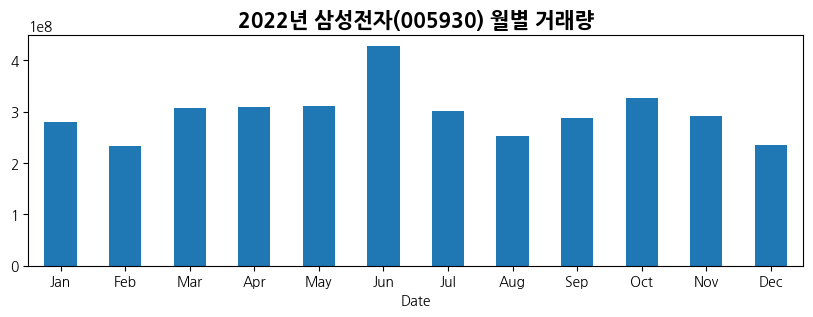

In [118]:
fig, ax = plt.subplots(figsize=(10, 3))
df = samsung['Volume'].resample(rule='M').sum()
df.plot.bar(rot=0, ax=ax)
ax.set_title('2022년 삼성전자(005930) 월별 거래량', fontsize=15, fontweight='bold')
ax.set_xticklabels(df.index.strftime('%b'))

plt.show()

### **2) 2022년 종가 차트**

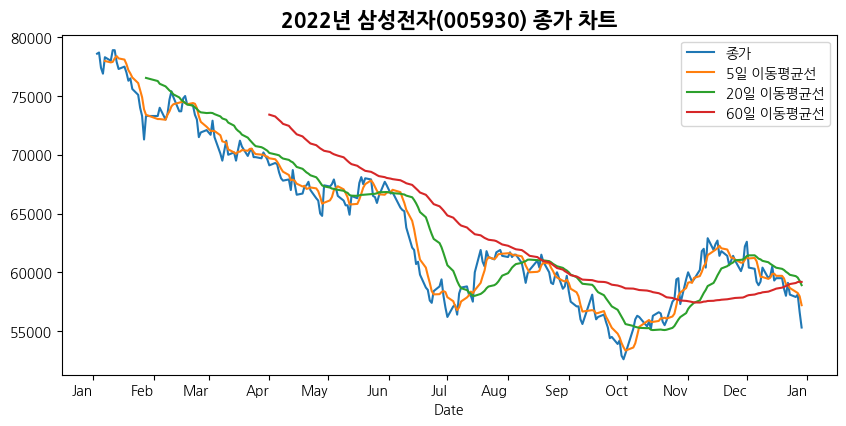

In [119]:
samsung['MA5'] = samsung['Close'].rolling(window=5).mean()
samsung['MA20'] = samsung['Close'].rolling(window=20).mean()
samsung['MA60'] = samsung['Close'].rolling(window=60).mean()

fig, ax = plt.subplots(figsize=(10, 5))

samsung[['Close','MA5','MA20','MA60']].plot(ax=ax)
ax.set_title('2022년 삼성전자(005930) 종가 차트', fontweight='bold', fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter("%b"))
ax.legend(labels=['종가', '5일 이동평균선', '20일 이동평균선', '60일 이동평균선'])

plt.show()

## **3) 6월 삼성(005930) 주식 차트 만들기**

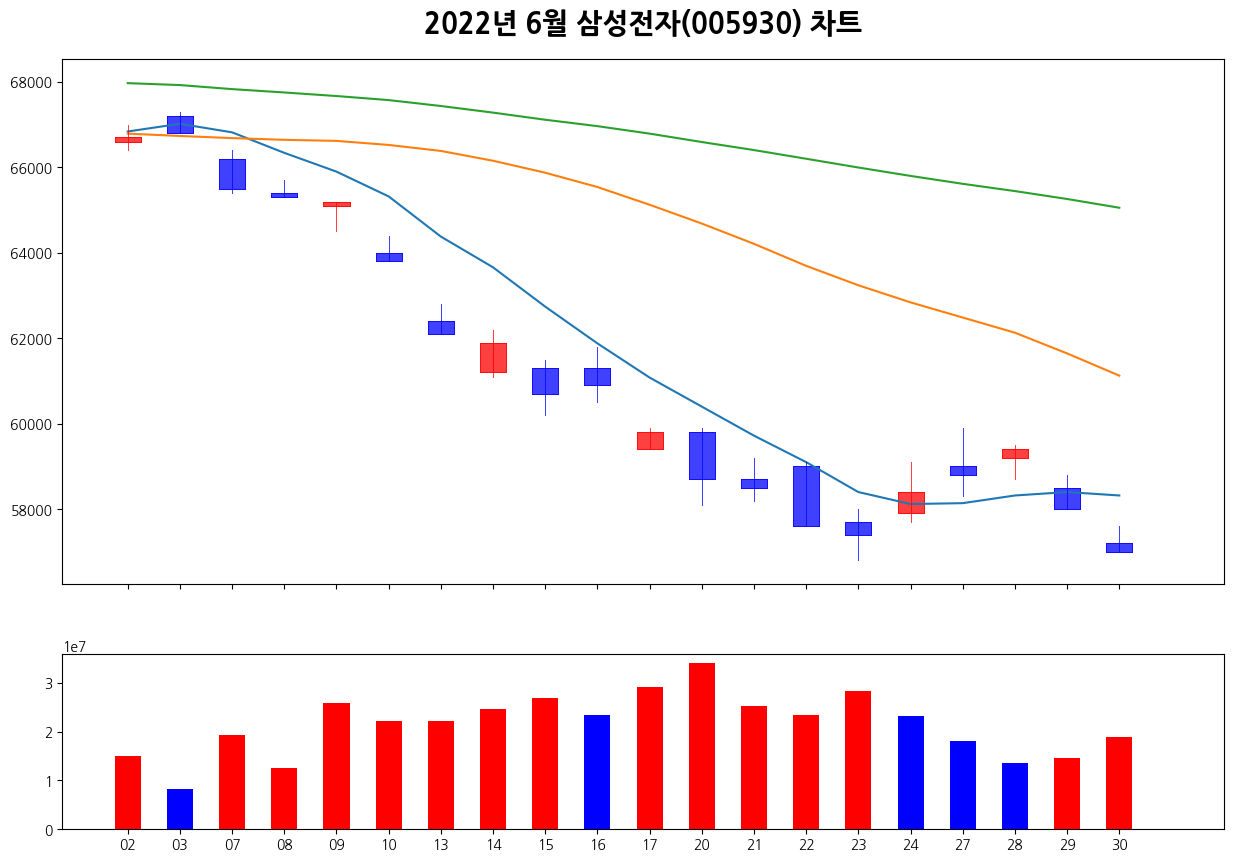

In [141]:
from mpl_finance import candlestick2_ohlc
import matplotlib.ticker as ticker

samsung['Month'] = samsung.index.strftime('%m')
df = samsung.loc[samsung['Month']=="06"]
index = df.index.strftime('%d').astype('str')
colors = df['Change'].apply(lambda x: 'b' if x > 0 else 'r').tolist()

fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True,
                       gridspec_kw={'height_ratios':[3,1]})

# top figure
ax[0].plot(index, df['MA5'])
ax[0].plot(index, df['MA20'])
ax[0].plot(index, df['MA60'])
ax[0].set_title('2022년 6월 삼성전자(005930) 차트', fontweight='bold', fontsize=20, pad=20)
candlestick2_ohlc(ax=ax[0], 
                  opens=df['Open'], 
                  highs=df['High'], 
                  lows=df['Low'], 
                  closes=df['Close'],
                  width=0.5, colorup='r', colordown='b')

# bottom figure
ax[1].bar(index, df['Volume'], width=0.5, color=colors)

plt.show()

In [121]:
import plotly.graph_objs as go 

trace = go.Candlestick(x=samsung.index,
                       open=samsung['Open'],
                       high=samsung['High'],
                       low=samsung['Low'],
                       close=samsung['Close'])

fig = go.Figure(data=[trace])
fig.show()